In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference')
print(os.getcwd())

/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference


In [3]:
import pprint
import glob
from pathlib import Path
import pickle
import random
import yaml
from PIL import Image

import numpy as np
import torch

from utils import general_utils, visualization_tools, eval_utils

In [4]:
device = torch.device("cuda:0")
classes = ["03001627"]
# path to the reconstruction dir. Must contain a "data_info".yaml file with its input_image_dir specified
# then, the input_image_dir must have a renders_camera_params.pt specifying the poses
for class_name in classes:
    input_dir_mesh = "/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/occupancy_networks/out/pytorch3d_renders_training/{}/generation/meshes".format(class_name)

    # obtaining corresponding img dir using data_info.yaml
    with open(os.path.join(input_dir_mesh, "data_info.yaml"), 'r') as f:
        input_dir_img = yaml.load(f, Loader=yaml.FullLoader)["dataset"]["input_dir_img"]
    # getting uncorrected gt poses inside img dir
    uncorrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_img, "renders_camera_params.pt"), "rb"))

    # correcting and saving the pose distances, to fit the reconstructions
    corrected_pred_poses_dict = general_utils.correct_dists(input_dir_img, input_dir_mesh, uncorrected_pred_poses_dict, device, num_dists=40)
    corrected_pred_poses_path = os.path.join(input_dir_mesh, "rec_camera_params.pt")
    pickle.dump(corrected_pred_poses_dict, open(corrected_pred_poses_path,"wb"))

skipped 58b3e0d46af2019bdd7092ed47061a36
skipped cd939609247df917d9d3572bbd9cf789
skipped 8cc42bd1f681f126d0176f9a144100cd
skipped 8b552c23c064b96179368d1198f406e7
skipped f39d0db80cf41db9820bd717b66cebfc
skipped 64ead031d2b04ef0504721639e19f609
skipped 7dc902a12843fa60e84c9243a4e577f
skipped 247dd48e4b6c029e4b3c42e318f3affc
skipped 4042faba97a901aa08cd647a48e605d
skipped c5c4e6110fbbf5d3d83578ca09f86027
skipped 2853ec74532f23f3670cf6c75c1c5868
skipped 78abbfe9ab73729f56d13e757b0dc374
skipped a004ad56474501f67eaeab1f0c9120b7
skipped ceec3aaa6ee72dee613f0dbd986ed6f8
skipped 758b4dd493ebb4b34ec0aa53d814a8cb
skipped bfe3afaa774eab6e29e17f7efc5a2421
skipped 4a19f4e47476ee654b3c42e318f3affc
skipped ab62680f067bf94dd6a6b5838ef6b356
skipped 6a2ae8bc01eef7b25e655c6c6e834498
skipped 71c83afeb7e203e1bb7d8446afd650f5
skipped 108b9cb292fd811cf51f77a6d7299806
skipped 901cab3f56c74894d7f7a4c4609b0913
skipped 6584413da69096db65ba78ad9601cf1b
skipped bceab717048f35fea481048c76a35623
skipped ff969b22a8

f595abef9bc7320944b2fa2cac0778f5 -- uncorrected
{'azim': 224.72128295898438, 'elev': 40.0, 'dist': 1.0}


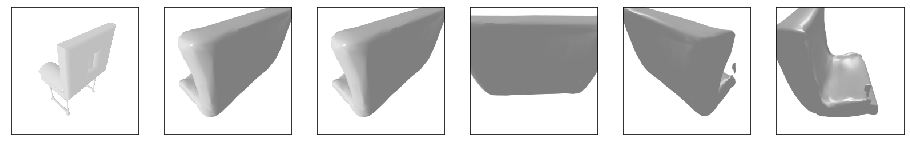

f595abef9bc7320944b2fa2cac0778f5 -- corrected
{'azim': 224.72128295898438, 'elev': 40.0, 'dist': 1.3333332538604736}


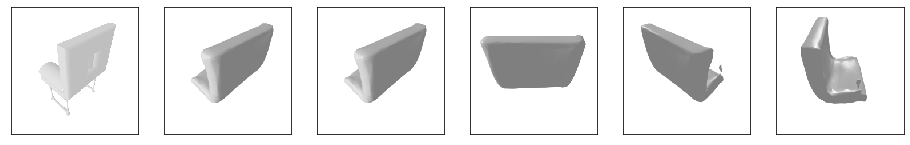

7a79fdfdd72f06e9f8bc1f8036e08e44 -- uncorrected
{'azim': 55.85786056518555, 'elev': 40.0, 'dist': 1.0}


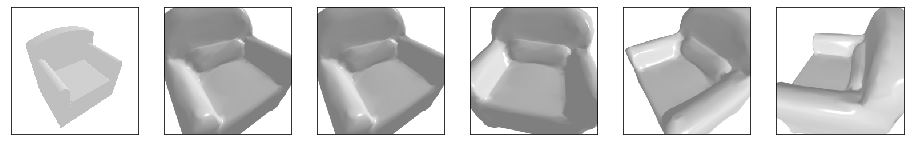

7a79fdfdd72f06e9f8bc1f8036e08e44 -- corrected
{'azim': 55.85786056518555, 'elev': 40.0, 'dist': 1.4615384340286255}


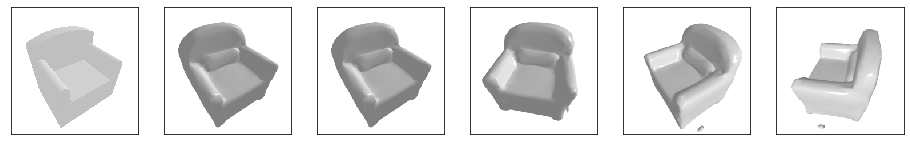

38444677513af4e7bc41009043d88b0 -- uncorrected
{'azim': 270.8161315917969, 'elev': 40.0, 'dist': 1.0}


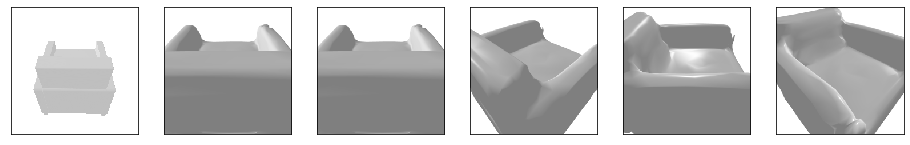

38444677513af4e7bc41009043d88b0 -- corrected
{'azim': 270.8161315917969, 'elev': 40.0, 'dist': 1.653846263885498}


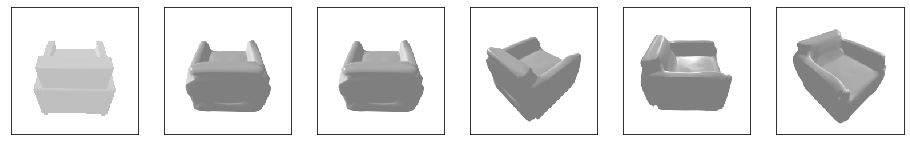

6beb16fbb2337f65936c7265c890fef -- uncorrected
{'azim': 71.92469787597656, 'elev': 40.0, 'dist': 1.0}


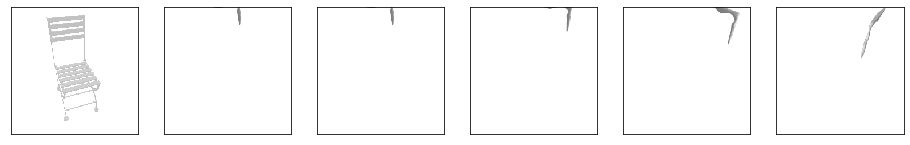

6beb16fbb2337f65936c7265c890fef -- corrected
{'azim': 71.92469787597656, 'elev': 40.0, 'dist': 1.2692307233810425}


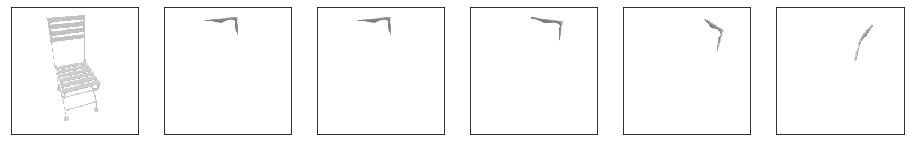

61eb0af11765544ef91663a74ccd2338 -- uncorrected
{'azim': 42.20453643798828, 'elev': 40.0, 'dist': 1.0}


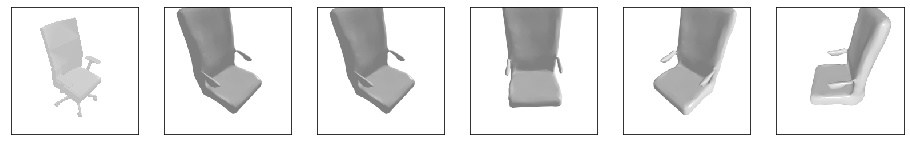

61eb0af11765544ef91663a74ccd2338 -- corrected
{'azim': 42.20453643798828, 'elev': 40.0, 'dist': 1.2692307233810425}


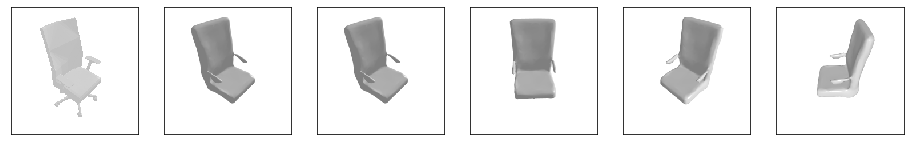

73f9aa75944ecf0b9debdd405104de8c -- uncorrected
{'azim': 248.76780700683594, 'elev': 40.0, 'dist': 1.0}


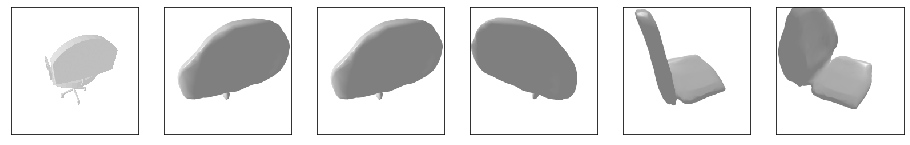

73f9aa75944ecf0b9debdd405104de8c -- corrected
{'azim': 248.76780700683594, 'elev': 40.0, 'dist': 1.2692307233810425}


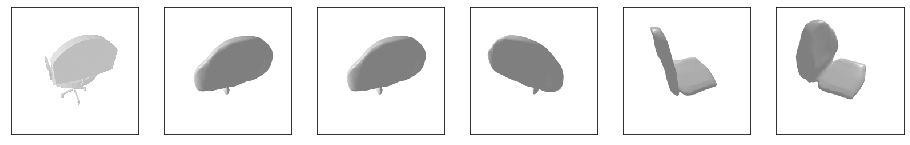

bfe54fe90c7d99637fffc92abe94e907 -- uncorrected
{'azim': 305.77471923828125, 'elev': 40.0, 'dist': 1.0}


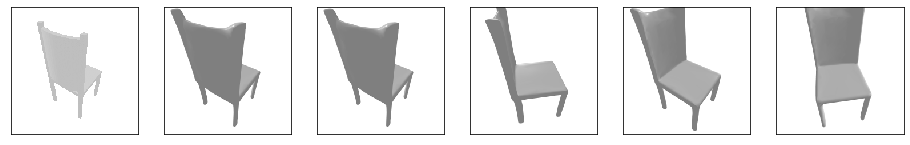

bfe54fe90c7d99637fffc92abe94e907 -- corrected
{'azim': 305.77471923828125, 'elev': 40.0, 'dist': 1.2051281929016113}


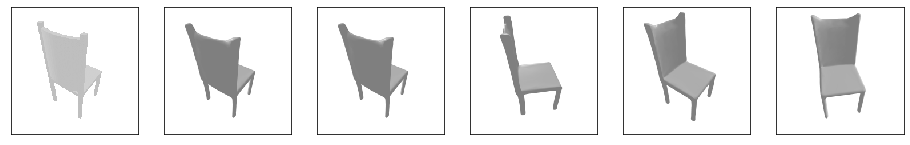

2bf69f0fa5be4c3f6ecea8cff53afe1a -- uncorrected
{'azim': 27.04207420349121, 'elev': 40.0, 'dist': 1.0}


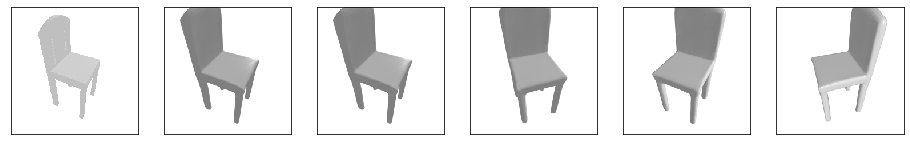

2bf69f0fa5be4c3f6ecea8cff53afe1a -- corrected
{'azim': 27.04207420349121, 'elev': 40.0, 'dist': 1.1410256624221802}


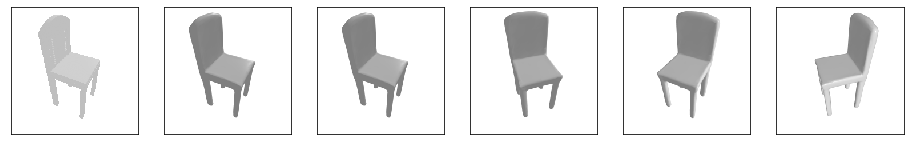

66342d92d51f402d3f7e27638e63d848 -- uncorrected
{'azim': 58.27665710449219, 'elev': 40.0, 'dist': 1.0}


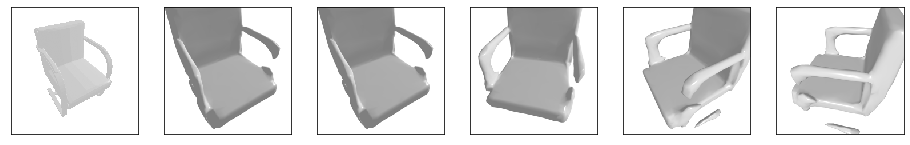

66342d92d51f402d3f7e27638e63d848 -- corrected
{'azim': 58.27665710449219, 'elev': 40.0, 'dist': 1.3974359035491943}


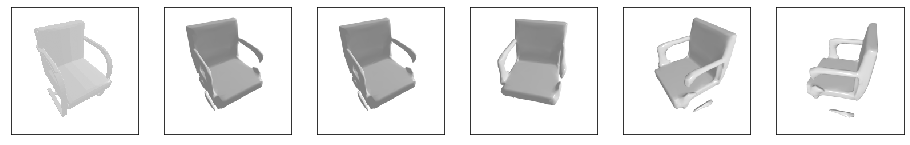

c18fd0dd722d164f41bb00bd5475793 -- uncorrected
{'azim': 81.32920837402344, 'elev': 40.0, 'dist': 1.0}


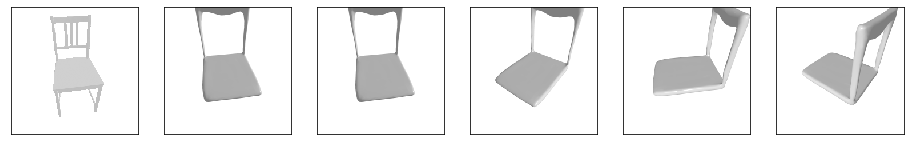

c18fd0dd722d164f41bb00bd5475793 -- corrected
{'azim': 81.32920837402344, 'elev': 40.0, 'dist': 1.2692307233810425}


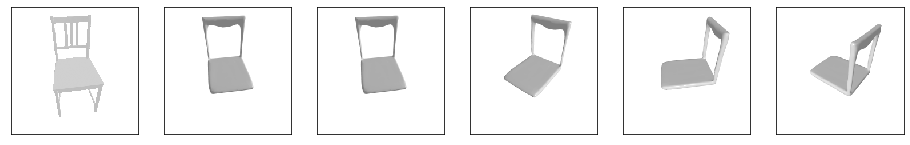

d334e5ab55188d62680876614ed35a7f -- uncorrected
{'azim': 30.436378479003906, 'elev': 40.0, 'dist': 1.0}


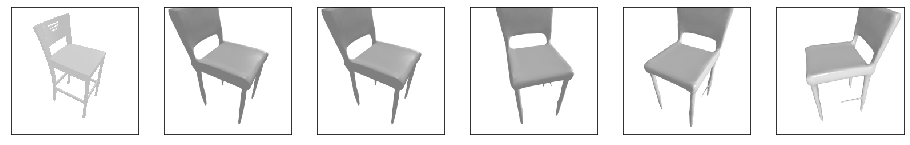

d334e5ab55188d62680876614ed35a7f -- corrected
{'azim': 30.436378479003906, 'elev': 40.0, 'dist': 1.2692307233810425}


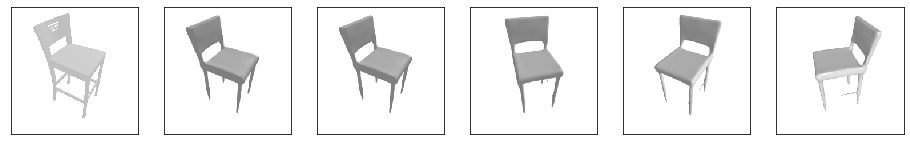

cf32f38c2b6c58dce45ef4135c266a12 -- uncorrected
{'azim': 146.32357788085938, 'elev': 40.0, 'dist': 1.0}


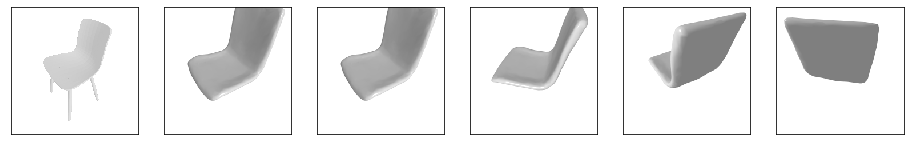

cf32f38c2b6c58dce45ef4135c266a12 -- corrected
{'azim': 146.32357788085938, 'elev': 40.0, 'dist': 1.3333332538604736}


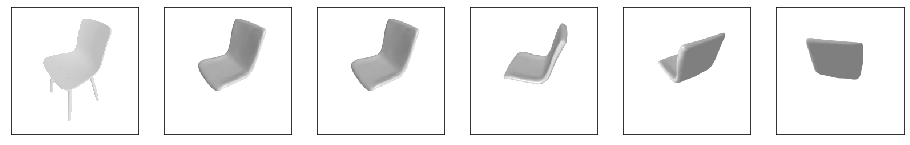

975ea4be01c7488611bc8e8361bc5303 -- uncorrected
{'azim': 37.093318939208984, 'elev': 40.0, 'dist': 1.0}


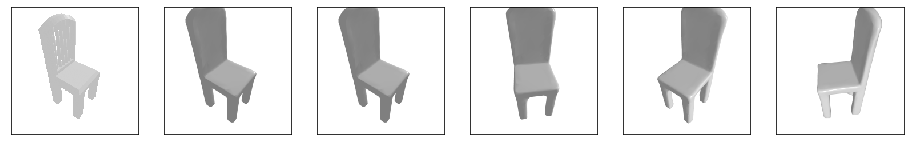

975ea4be01c7488611bc8e8361bc5303 -- corrected
{'azim': 37.093318939208984, 'elev': 40.0, 'dist': 1.1410256624221802}


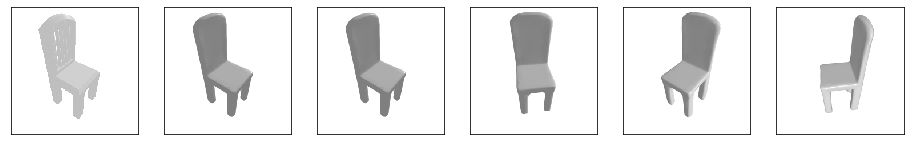

c877660e0ec15c0d22be63590e183603 -- uncorrected
{'azim': 141.9844970703125, 'elev': 40.0, 'dist': 1.0}


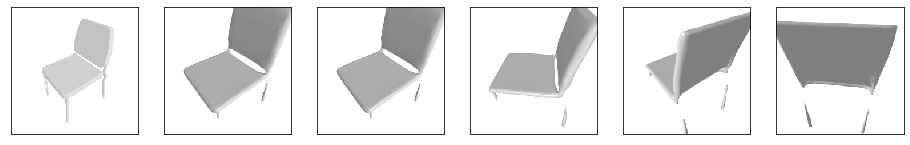

c877660e0ec15c0d22be63590e183603 -- corrected
{'azim': 141.9844970703125, 'elev': 40.0, 'dist': 1.3333332538604736}


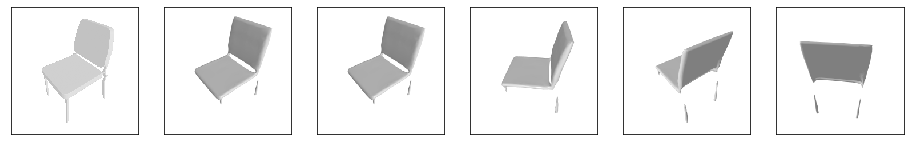

39825fb4341ebd1ccb002c1e2b5fc68b -- uncorrected
{'azim': 357.6075439453125, 'elev': 40.0, 'dist': 1.0}


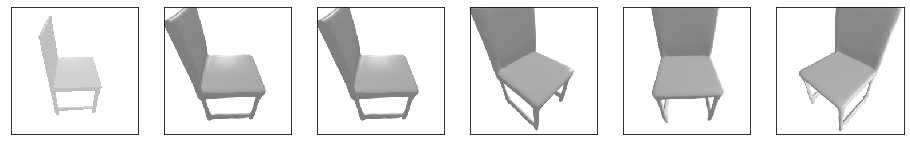

39825fb4341ebd1ccb002c1e2b5fc68b -- corrected
{'azim': 357.6075439453125, 'elev': 40.0, 'dist': 1.2692307233810425}


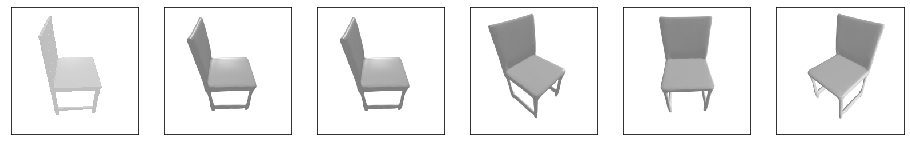

a7154b3c2b2a0641a9fe1734a6086750 -- uncorrected
{'azim': 111.9678726196289, 'elev': 40.0, 'dist': 1.0}


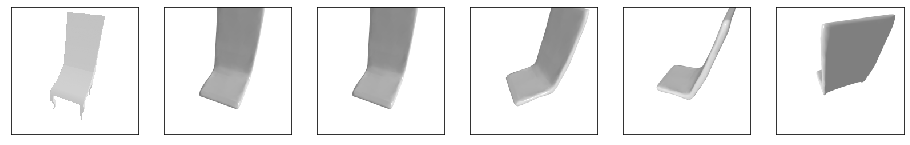

a7154b3c2b2a0641a9fe1734a6086750 -- corrected
{'azim': 111.9678726196289, 'elev': 40.0, 'dist': 1.2051281929016113}


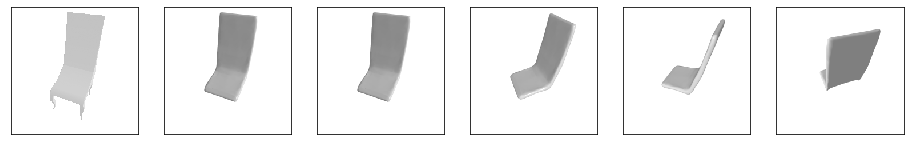

70aaed71e394259c87a0ca36e3a00f4e -- uncorrected
{'azim': 348.9226379394531, 'elev': 40.0, 'dist': 1.0}


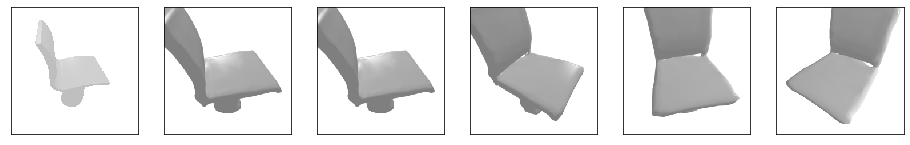

70aaed71e394259c87a0ca36e3a00f4e -- corrected
{'azim': 348.9226379394531, 'elev': 40.0, 'dist': 1.4615384340286255}


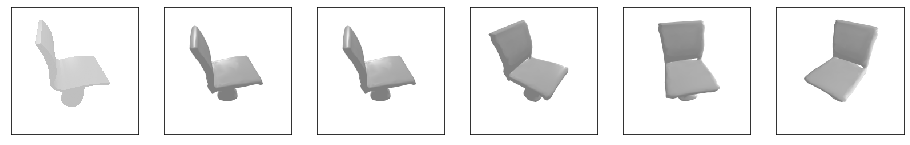

c747e6ceb1a6faaa3074f48b99186254 -- uncorrected
{'azim': 206.16156005859375, 'elev': 40.0, 'dist': 1.0}


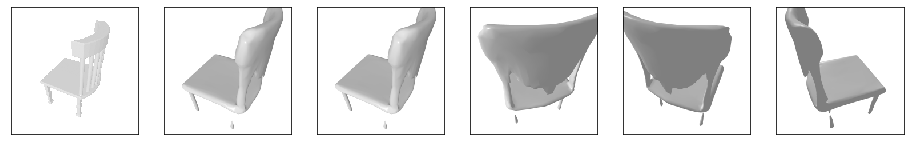

c747e6ceb1a6faaa3074f48b99186254 -- corrected
{'azim': 206.16156005859375, 'elev': 40.0, 'dist': 1.3333332538604736}


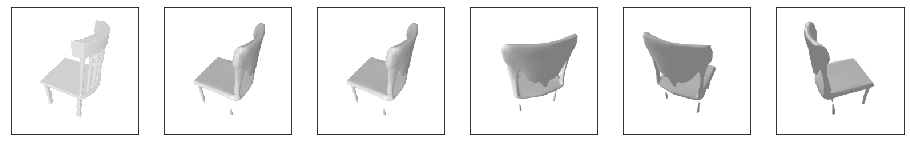

8e1f9f4e3cd226bacb916d8f4f1ff996 -- uncorrected
{'azim': 343.1089172363281, 'elev': 40.0, 'dist': 1.0}


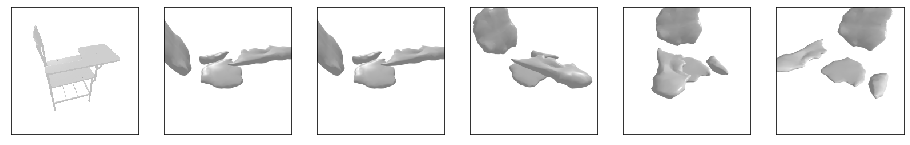

8e1f9f4e3cd226bacb916d8f4f1ff996 -- corrected
{'azim': 343.1089172363281, 'elev': 40.0, 'dist': 1.3974359035491943}


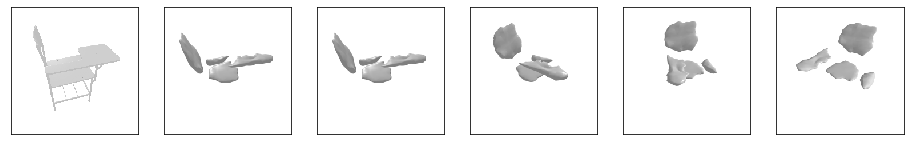

37cea3ba8e5a146da6fee8e2140acec9 -- uncorrected
{'azim': 25.635738372802734, 'elev': 40.0, 'dist': 1.0}


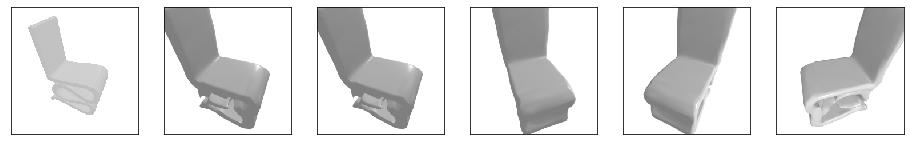

37cea3ba8e5a146da6fee8e2140acec9 -- corrected
{'azim': 25.635738372802734, 'elev': 40.0, 'dist': 1.3333332538604736}


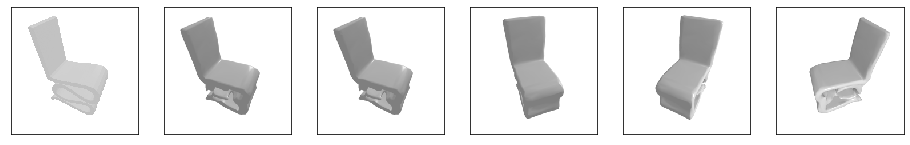

6f0def5e832f3614c01e0156f398b4d2 -- uncorrected
{'azim': 32.61250686645508, 'elev': 40.0, 'dist': 1.0}


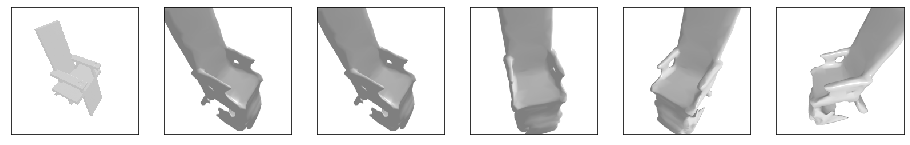

6f0def5e832f3614c01e0156f398b4d2 -- corrected
{'azim': 32.61250686645508, 'elev': 40.0, 'dist': 1.4615384340286255}


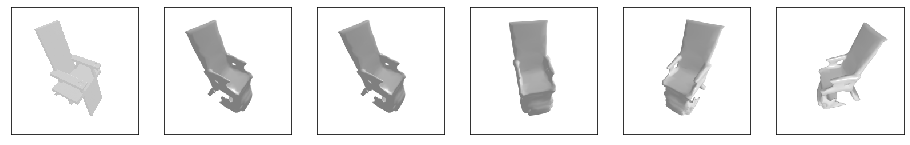

fae27953e0f0404ca99df2794ec76201 -- uncorrected
{'azim': 263.58343505859375, 'elev': 40.0, 'dist': 1.0}


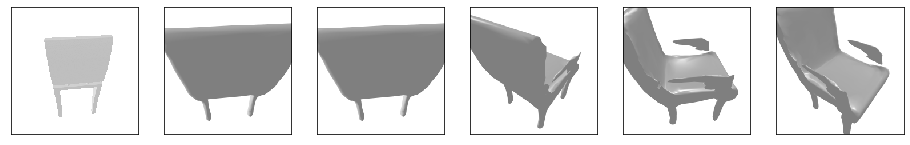

fae27953e0f0404ca99df2794ec76201 -- corrected
{'azim': 263.58343505859375, 'elev': 40.0, 'dist': 1.3333332538604736}


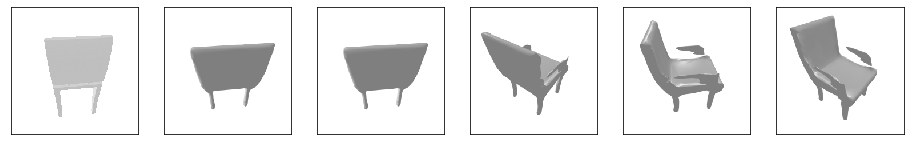

In [5]:
show_num = 20
uncorrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_img, "renders_camera_params.pt"), "rb"))
corrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_mesh, "rec_camera_params.pt"), "rb"))

for i, instance in enumerate(uncorrected_pred_poses_dict):
    input_img_path = os.path.join(input_dir_img,"{}.png".format(instance))
    input_image = np.asarray(Image.open(input_img_path))
    input_mesh_path = os.path.join(input_dir_mesh,"{}.obj".format(instance))
    input_mesh = general_utils.load_untextured_mesh(input_mesh_path, device)
    
    print("{} -- uncorrected".format(instance))
    print(uncorrected_pred_poses_dict[instance])
    dist = uncorrected_pred_poses_dict[instance]["dist"]
    elev = uncorrected_pred_poses_dict[instance]["elev"]
    azim = uncorrected_pred_poses_dict[instance]["azim"]
    visualization_tools.show_refinement_results(input_image, input_mesh, input_mesh, dist, elev, azim, device)
    
    print("{} -- corrected".format(instance))
    print(corrected_pred_poses_dict[instance])
    dist = corrected_pred_poses_dict[instance]["dist"]
    elev = corrected_pred_poses_dict[instance]["elev"]
    azim = corrected_pred_poses_dict[instance]["azim"]
    visualization_tools.show_refinement_results(input_image, input_mesh, input_mesh, dist, elev, azim, device)
    if i > show_num:
        break
    print("======================================================================================================================================================================")
    print("======================================================================================================================================================================")